### Steps
#### 1- Import necessary libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler , LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### 2- Read and explore the dataset

In [2]:
df = pd.read_excel('HousePricePrediction.xlsx')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
len(df)

2919

In [5]:
#Checking Null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [6]:
#test df for which we have to predict the values
test = df.loc[df['SalePrice'].isna()].drop(columns='SalePrice',axis=1)

In [7]:
test.dropna(inplace=True)

In [8]:
#dropping null values
df.dropna(inplace = True)

In [9]:
df.head(2)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0


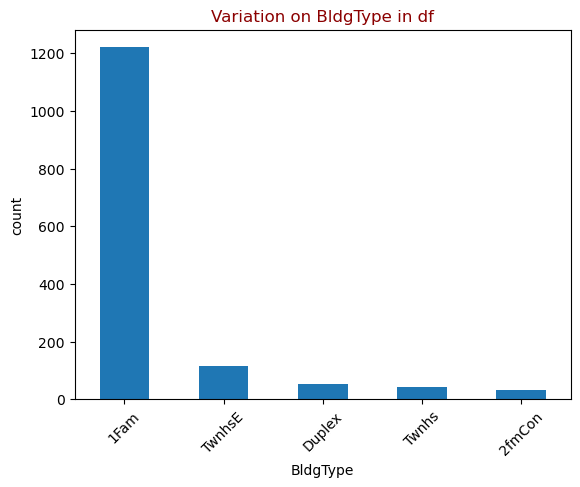

In [10]:
df['BldgType'].value_counts().plot(kind='bar')
plt.title('Variation on BldgType in df',c='darkred')
plt.xticks(rotation=45)
plt.ylabel("count")
plt.show()

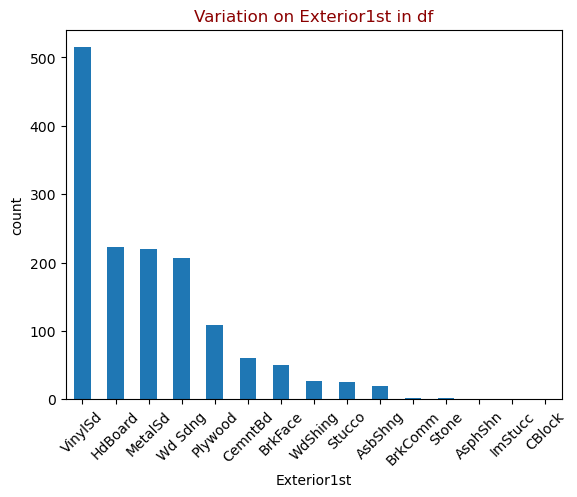

In [11]:
df['Exterior1st'].value_counts().plot(kind='bar')
plt.title('Variation on Exterior1st in df',c='darkred')
plt.xticks(rotation=45)
plt.ylabel("count")
plt.show()

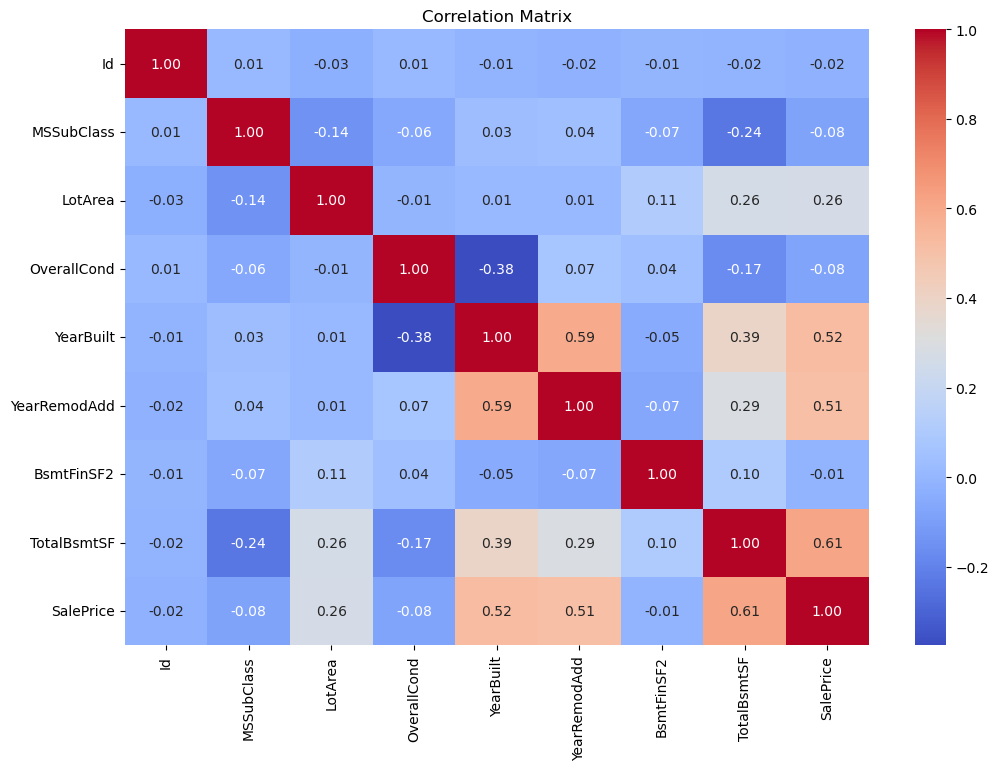

In [12]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

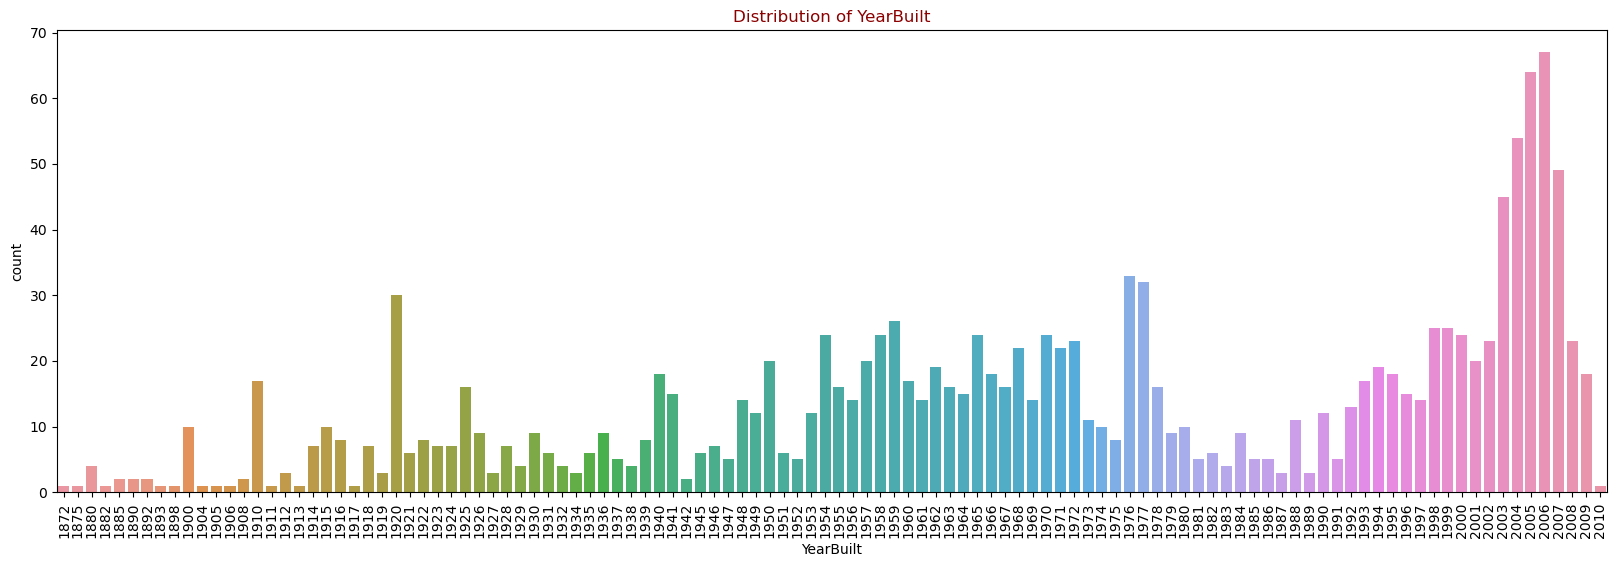

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(x='YearBuilt', data=df)
plt.title('Distribution of YearBuilt',c='darkred')
plt.xticks(rotation=90)
plt.show()

### 3-preprocessing

In [14]:
rs =RobustScaler()
le = LabelEncoder()

In [15]:
def clean(x):
    x=x.drop('Id',axis=1)
    num = x.select_dtypes(exclude = 'object').columns
    cat = x.select_dtypes(include = 'object').columns
    x[num] = rs.fit_transform(x[num])
    for col in cat:
        x[col] = le.fit_transform(x[col])
    return x


In [16]:
test_clean = clean(test)

In [17]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [18]:
X = clean(X)

In [19]:
X.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,0.2,3,-0.254076,4,0,0.0,0.652174,0.243243,12,0.0,-0.269652
1,-0.6,3,0.030015,2,0,3.0,0.065217,-0.486486,8,0.0,0.538308
2,0.2,3,0.437624,4,0,0.0,0.608696,0.216216,12,0.0,-0.142289
3,0.4,3,0.017663,0,0,0.0,-1.260870,-0.648649,13,0.0,-0.468657
4,0.2,3,1.181201,2,0,0.0,0.586957,0.162162,12,0.0,0.305473


In [20]:
rfr = RandomForestRegressor(max_depth=3)
lr = LinearRegression()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [23]:
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)

In [24]:
print(" MAE Train :: ",mean_absolute_error(y_train,train_pred))
print(" MAE test :: ",mean_absolute_error(y_test,test_pred))

 MAE Train ::  30733.707523670277
 MAE test ::  32438.189114273453


In [43]:
print(" R2 score Train :: ",r2_score(y_train,train_pred))
print(" R2 score test :: ",r2_score(y_test,test_pred))

 R2 score Train ::  0.9627252768722246
 R2 score test ::  0.8129222202293245


In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [27]:
#### Evaluate the model's accuracy

In [28]:
print(" MAE Train :: ",mean_absolute_error(y_train,train_pred))
print(" MAE test :: ",mean_absolute_error(y_test,test_pred))

 MAE Train ::  34247.249573527966
 MAE test ::  35498.70543044242


In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [1,2, 5],
    'min_samples_leaf': [1, 2, 4]
}

In [30]:
gs = GridSearchCV(estimator=rfr,param_grid=param_grid,cv = 3)

In [31]:
gs.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(max_depth=3),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [50, 100, 200]})

In [32]:
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 1,
 'n_estimators': 100}

In [33]:
rfr = RandomForestRegressor(n_estimators = 100,max_depth=20,min_samples_leaf=1,min_samples_split=2)

In [34]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=20)

In [35]:
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)

In [36]:
print(" MAE Train :: ",mean_absolute_error(y_train,train_pred))
print(" MAE test :: ",mean_absolute_error(y_test,test_pred))

 MAE Train ::  8922.22724242203
 MAE test ::  22793.998630218903


In [37]:
preds = rfr.predict(test_clean)

In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [39]:
test['SalePrice'] = preds

In [40]:
test

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1460,1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,882.0,135059.916667
1461,1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,1329.0,180324.000000
1462,1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,928.0,204757.000000
1463,1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,926.0,203287.750000
1464,1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,1280.0,211270.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,107307.000000
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,98704.640000
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,228813.980000
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,190129.000000


In [41]:
df_new=pd.concat([df,test],axis=0)

In [42]:
df_new

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,107307.00
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,98704.64
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,228813.98
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,190129.00
